In [1]:
from utils import labels_loader, image_loader
import pandas as pd
import random
import os
import numpy as np

In [2]:
images_path = 'galaxy-zoo_data/images_training_rev1/'
labels_path = 'galaxy-zoo_data/training_solutions_rev1.csv'

# Labels and one-hot encoding

In [3]:
labels_df = pd.read_csv(labels_path)

labels_df = labels_df[['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class7.1', 'Class7.2', 'Class7.3']]

In [4]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.201463,0.181684,0.000000
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.000000,0.135082,0.191919
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.741864,0.023853
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.408599,0.284778,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.494587,0.439252,0.000000


In [5]:
labels_df.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
count,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000
mean,550179.708337,0.432526,0.542261,0.025213,0.106408,0.435854,0.170021,0.207765,0.054740
std,258724.130197,0.283517,0.296429,0.037967,0.212505,0.301867,0.238860,0.215967,0.110445
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327874.250000,0.175812,0.280862,0.000000,0.000000,0.168490,0.000000,0.032554,0.000000
50%,551933.000000,0.416994,0.558754,0.014870,0.000000,0.394850,0.035954,0.125757,0.000000
75%,773232.000000,0.679182,0.811339,0.034325,0.085161,0.694615,0.280679,0.333788,0.049136
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,0.883481


In [6]:
# Generate a LaTeX output of the DataFrame (head only)
latex_output = labels_df.head().to_latex(index=False)

# Display the LaTeX output
print(latex_output)

\begin{tabular}{rrrrrrrrr}
\toprule
 GalaxyID &  Class1.1 &  Class1.2 &  Class1.3 &  Class2.1 &  Class2.2 &  Class7.1 &  Class7.2 &  Class7.3 \\
\midrule
   100008 &  0.383147 &  0.616853 &  0.000000 &  0.000000 &  0.616853 &  0.201463 &  0.181684 &  0.000000 \\
   100023 &  0.327001 &  0.663777 &  0.009222 &  0.031178 &  0.632599 &  0.000000 &  0.135082 &  0.191919 \\
   100053 &  0.765717 &  0.177352 &  0.056931 &  0.000000 &  0.177352 &  0.000000 &  0.741864 &  0.023853 \\
   100078 &  0.693377 &  0.238564 &  0.068059 &  0.000000 &  0.238564 &  0.408599 &  0.284778 &  0.000000 \\
   100090 &  0.933839 &  0.000000 &  0.066161 &  0.000000 &  0.000000 &  0.494587 &  0.439252 &  0.000000 \\
\bottomrule
\end{tabular}



/var/folders/dp/bqxp8q3s61sfdwkbrxdklx3w0000gn/T/ipykernel_53941/1539508198.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = labels_df.head().to_latex(index=False)


In [7]:
labels_I = labels_loader(folder=labels_path, task=2, min=0.8, one_hot_enc=True)

labels_I

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
4,100090,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,100134,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14,100237,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
16,100263,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
19,100322,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
61565,999786,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61566,999795,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
61568,999875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
61574,999950,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
from utils import data_inspector

data_inspector(labels=labels_I)

Counts of Class1 Subclasses:
Class1.1 -> Smooth: 8132 samples
Class1.2 -> Features/Disk: 16141 samples
Class1.3 -> Star/Artifact: 2 samples

Counts of Class2 Subclasses among those assigned to Class1.2:
Class2.1 -> Normal Disk: 3008 samples
Class2.2 -> Edge-on viewed Disk: 13133 samples

Counts of Class7 Subclasses among those assigned to Class1.1:
Class7.1 -> Round: 4369 samples
Class7.2 -> Eliptical: 3645 samples
Class7.3 -> Cigar: 118 samples


In [9]:
labels_II = labels_loader(folder=labels_path, task=2, min=0.5, one_hot_enc=True)

labels_II

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
0,100008,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100023,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100053,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100078,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100090,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
61573,999948,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61574,999950,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61575,999958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
61576,999964,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
data_inspector(labels=labels_II)

Counts of Class1 Subclasses:
Class1.1 -> Smooth: 25874 samples
Class1.2 -> Features/Disk: 34105 samples
Class1.3 -> Star/Artifact: 44 samples

Counts of Class2 Subclasses among those assigned to Class1.2:
Class2.1 -> Normal Disk: 6626 samples
Class2.2 -> Edge-on viewed Disk: 27479 samples

Counts of Class7 Subclasses among those assigned to Class1.1:
Class7.1 -> Round: 11733 samples
Class7.2 -> Eliptical: 12628 samples
Class7.3 -> Cigar: 1513 samples


# Image analysis, preprocessing and Augmentations

In [168]:
indices = labels_I.index.to_numpy()
filenames = np.array([filename for filename in sorted(os.listdir(images_path))])

# Randomly select 5 indices from the filenames list
selected_indices = random.sample(sorted(indices), 4)
selected_names_ = [filenames[idx] for idx in selected_indices]
selected_names = [os.path.splitext(filename)[0] for filename in selected_names_]

In [169]:
images = image_loader(folder=images_path, indices=selected_indices, img_size=(424, 424))

Loading images: 100%|█████████████████████████████████████████████████| 4/4


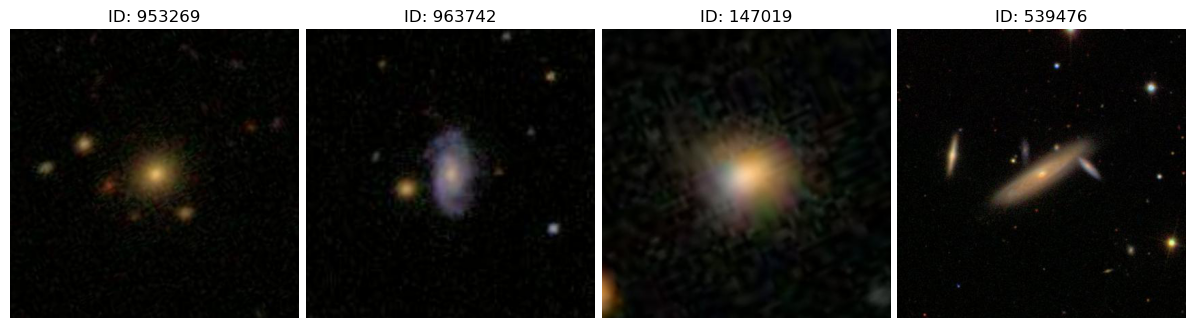

In [170]:
from utils import image_plotter

image_plotter(images=images, names=selected_names, ncols=2, plot_size=(12,4), title='fullsize', folder_path='image_plots/')

In [171]:
images64 = image_loader(folder=images_path, indices=selected_indices, img_size=(64, 64))

Loading images: 100%|█████████████████████████████████████████████████| 4/4


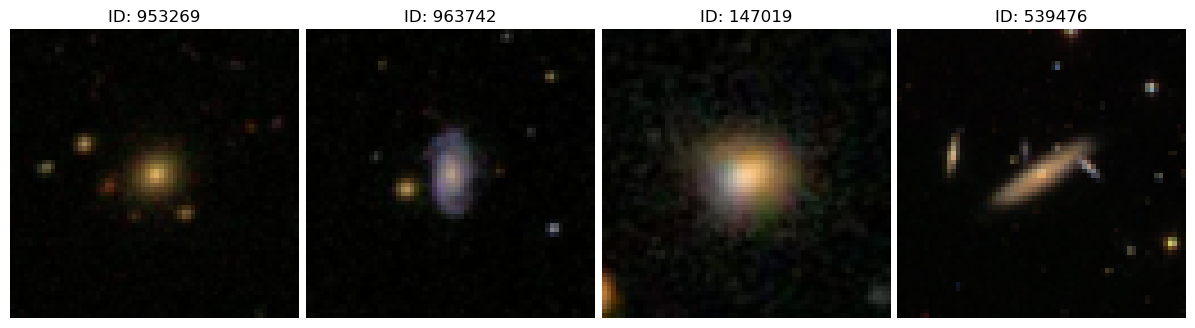

In [172]:
image_plotter(images=images64, names=selected_names, ncols=2, plot_size=(12,4), title='resized64', folder_path='image_plots/')

In [173]:
from custom_layers import MultiOutputDataGenerator

data_augmentation_params = {
    'rotation_range' : 90,
    'width_shift_range' : 0.075,
    'height_shift_range': 0.075,
    'horizontal_flip': True,
    'vertical_flip': True,
    'shear_range': 0.2,
    'zoom_range': 0.25
}

y = np.zeros(shape=len(images64))

generator = MultiOutputDataGenerator(x_set=images64, y_set=y, batch_size=len(images64), parameters = data_augmentation_params, shuffle=False)

In [174]:
images64_aug, _ = generator[0]

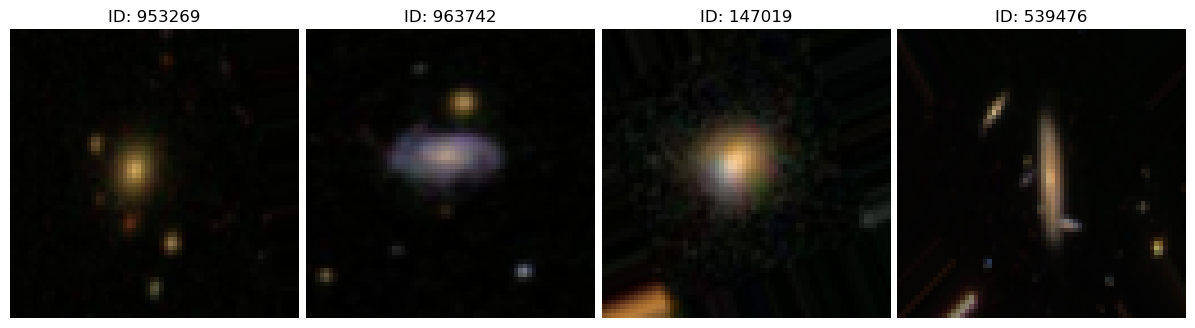

In [175]:
image_plotter(images=images64_aug, names=selected_names, ncols=4, plot_size=(12,4), title='resized64_aug', folder_path='image_plots/')

# Results analysis

## Base model

In [2]:
from keras.models import load_model
from keras import models
from custom_layers import Maxout
from models import F1_score

# Load the model and history
model = load_model('saved_models/Base_ModelI_nobatch.h5', custom_objects={'Maxout' : Maxout, 'F1_score' : F1_score})
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                             

In [ ]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 1,
  'min' : 0.8,
  'one_hot_labels' : True,
  'crop' : False,
  'crop_size' : None ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.20,
}

X_train, X_val, X_test, y_train, y_val, y_test = data_loader(images_folder=images_path, 
                                                                labels_path=labels_path, 
                                                                **data_preprocessing, 
                                                                random_seed=48)

## Hierarchy model,  MSE LOSS

In [11]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 2,
  'min' : 0.5,
  'one_hot_labels' : False,
  'crop' : True,
  'crop_size' : 256 ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.25,
}

X_train, X_val, X_test, y_train_, y_val_, y_test_ = data_loader(images_folder=images_path, 
                                                                     labels_path=labels_path, **data_preprocessing, 
                                                                     random_seed=48)

y_train = [y_train_[:,:3], y_train_[:,3:5], y_train_[:,5:]]
y_val = [y_val_[:,:3], y_val_[:,3:5], y_val_[:,5:]]
y_test= [y_test_[:,:3], y_test_[:,3:5], y_test_[:,5:]]

Loading images: 100%|█████████████████████████████████████████| 60023/60023


In [12]:
from keras.models import load_model
from keras import models

# Load the model and history
model = load_model('saved_models/Hierarchy_ModelII_regression.h5')
model.summary()

/Users/danielsb/opt/anaconda3/envs/tflow/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:327: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['activation[0][0]']             
                                                                                              

In [13]:
y_pred = model.predict(X_test)

376/376 [==============================] - 9s 22ms/step


In [14]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [15]:
np.sum(y_pred[0], axis=1)

array([0.9851999 , 0.98941946, 0.9912421 , ..., 0.97974867, 1.0244845 ,
       0.9613854 ], dtype=float32)

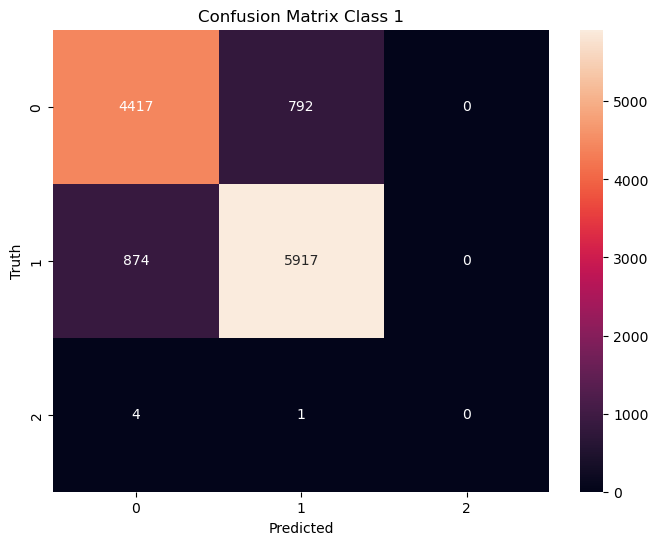

In [16]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class1_labels = np.argmax(y_test[0], axis=1)
pred_class1_labels = np.argmax(y_pred[0], axis=1)

cm = confusion_matrix(y_true=test_class1_labels, y_pred=pred_class1_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
n_predicted_11 = np.sum(cm[:,0])
n_predicted_12 = np.sum(cm[:,1])

print(n_predicted_11,n_predicted_12)

5295 6710


In [18]:
mask11 = np.argmax(y_pred[0], axis=1) == 0
mask12 = np.argmax(y_pred[0], axis=1) == 1

selected_class2 = y_pred[1][mask12]
selected_class7 = y_pred[2][mask11]

selected_class2.shape, selected_class7.shape

((6710, 2), (5295, 3))

In [19]:
y_test[1].shape, y_test[2].shape

((12005, 2), (12005, 3))

In [20]:
test_class2 = y_test[1][(np.argmax(y_pred[0], axis=1) == 1)]
test_class7 = y_test[2][(np.argmax(y_pred[0], axis=1) == 0)]

test_class2.shape, test_class7.shape

((6710, 2), (5295, 3))

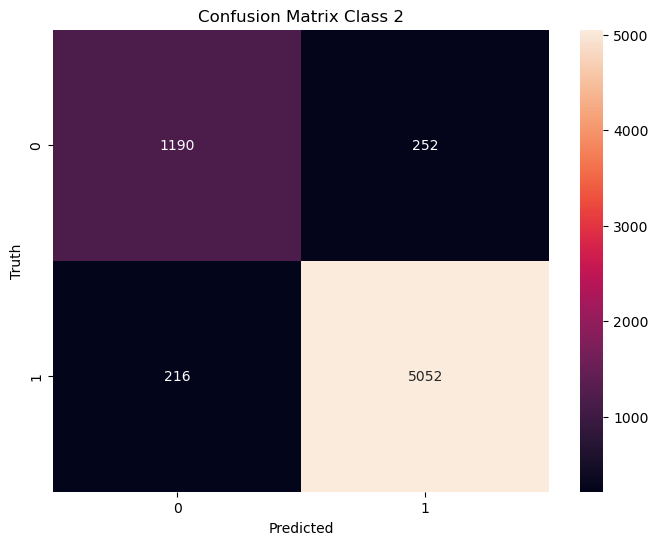

In [21]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class2_labels = np.argmax(test_class2, axis=1)
selected_class2_labels = np.argmax(selected_class2, axis=1)

cm2 = confusion_matrix(y_true=test_class2_labels, y_pred=selected_class2_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm2, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 2')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [22]:
np.sum(cm2)

6710

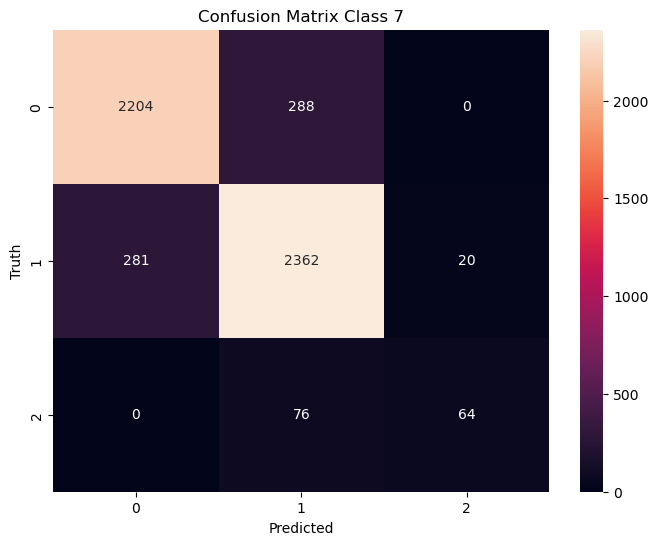

In [23]:
test_class7_labels = np.argmax(test_class7, axis=1)
selected_class7_labels = np.argmax(selected_class7, axis=1)

cm7 = confusion_matrix(y_true=test_class7_labels, y_pred=selected_class7_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm7, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 7')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [24]:
np.sum(cm7)

5295

376/376 [==============================] - 9s 23ms/step


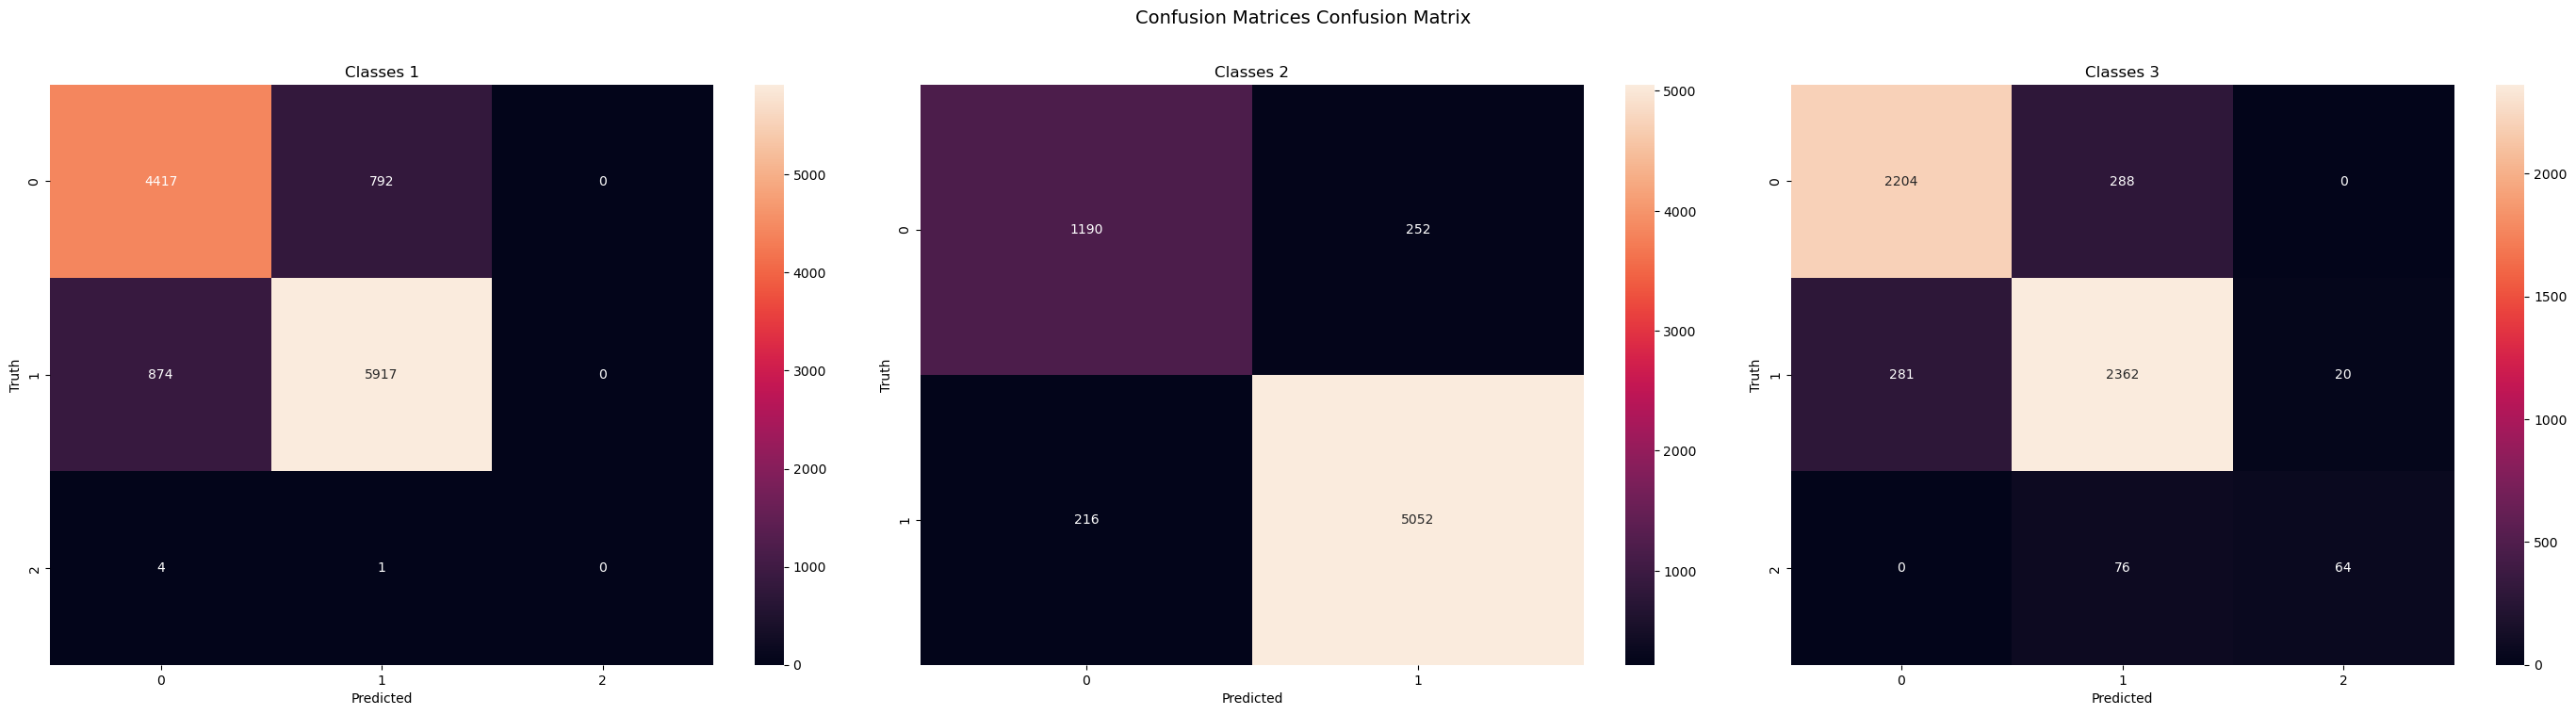

In [25]:
from eval import ConfusionMatrix

y_true = [y_test[0], test_class2, test_class7]
y_predicted = [y_pred[0], selected_class2, selected_class7]

ConfusionMatrix(model=model, data_test=(X_test, y_test), name='Hierarchy model with MSE loss')

In [26]:
import pickle

# Load the history from a pickle file
with open('saved_models/History_Hierarchy_ModelII_regression', 'rb') as file:
    history = pickle.load(file)
    
history.keys()

dict_keys(['loss', 'Class1_loss', 'Class2_loss', 'Class3_loss', 'Class1_accuracy', 'Class2_accuracy', 'Class3_accuracy', 'val_loss', 'val_Class1_loss', 'val_Class2_loss', 'val_Class3_loss', 'val_Class1_accuracy', 'val_Class2_accuracy', 'val_Class3_accuracy'])

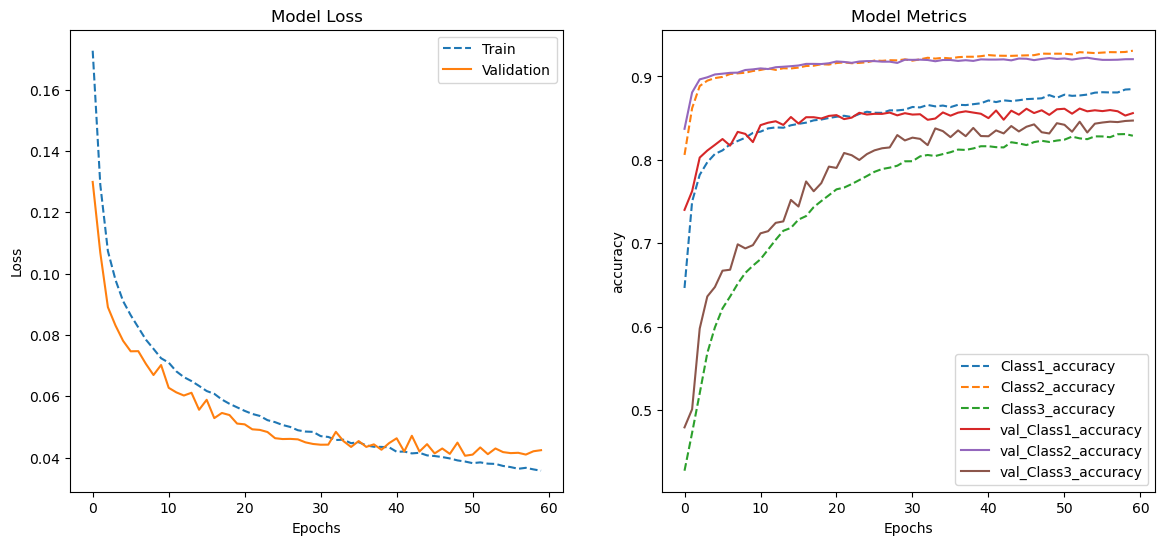

In [36]:
from eval import plot_history

metric = 'accuracy'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    
    # Plot loss
ax1.plot(history['loss'], label='Train', linestyle='--')
ax1.plot(history['val_loss'], label='Validation')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
    
# Plot metrics
for key in history.keys():
    if metric in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax2.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax2.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax2.set_title('Model Metrics')
ax2.set_xlabel('Epochs')
ax2.set_ylabel(metric)
ax2.legend(loc='best')

## Hierarchy model,  FOCAL LOSS

In [ ]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 2,
  'min' : 0.5,
  'one_hot_labels' : False,
  'crop' : True,
  'crop_size' : 256 ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.25,
}

X_train, X_val, X_test, y_train_, y_val_, y_test_ = data_loader(images_folder=images_path, 
                                                                     labels_path=labels_path, **data_preprocessing, 
                                                                     random_seed=48)

y_train = [y_train_[:,:3], y_train_[:,3:5], y_train_[:,5:]]
y_val = [y_val_[:,:3], y_val_[:,3:5], y_val_[:,5:]]
y_test= [y_test_[:,:3], y_test_[:,3:5], y_test_[:,5:]]

Loading images: 100%|█████████████████████████████████████████| 60023/60023


In [39]:
from keras.models import load_model
from custom_losses import FocalLoss 

# Load the model and history
model = load_model('saved_models/Hierarchy_ModelII_regression_focalloss.h5', custom_objects={'FocalLoss': FocalLoss})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['activation[0][0]']             
                                                                                              

In [40]:
y_pred = model.predict(X_test)

376/376 [==============================] - 8s 20ms/step


In [41]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [42]:
np.sum(y_pred[0], axis=1)

array([1.2075195, 1.0568902, 1.1794127, ..., 1.1641792, 1.2290938,
       1.1616213], dtype=float32)

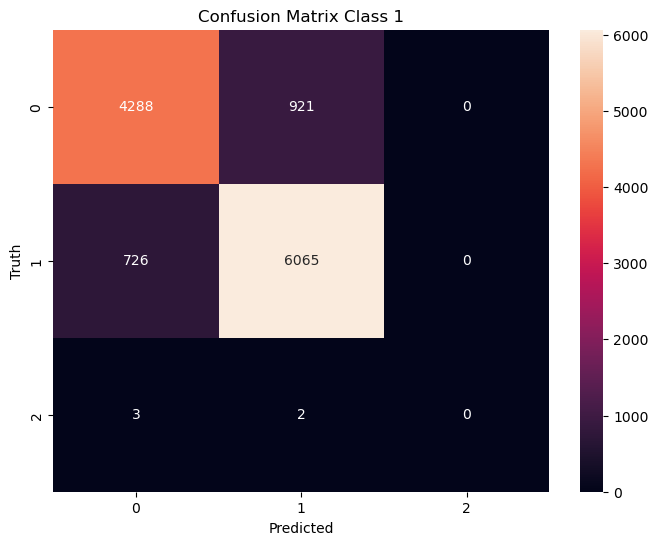

In [43]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class1_labels = np.argmax(y_test[0], axis=1)
pred_class1_labels = np.argmax(y_pred[0], axis=1)

cm = confusion_matrix(y_true=test_class1_labels, y_pred=pred_class1_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [44]:
n_predicted_11 = np.sum(cm[:,0])
n_predicted_12 = np.sum(cm[:,1])

print(n_predicted_11,n_predicted_12)

5017 6988


In [45]:
mask11 = np.argmax(y_pred[0], axis=1) == 0
mask12 = np.argmax(y_pred[0], axis=1) == 1

selected_class2 = y_pred[1][mask12]
selected_class7 = y_pred[2][mask11]

selected_class2.shape, selected_class7.shape

((6988, 2), (5017, 3))

In [46]:
y_test[1].shape, y_test[2].shape

((12005, 2), (12005, 3))

In [47]:
test_class2 = y_test[1][(np.argmax(y_pred[0], axis=1) == 1)]
test_class7 = y_test[2][(np.argmax(y_pred[0], axis=1) == 0)]

test_class2.shape, test_class7.shape

((6988, 2), (5017, 3))

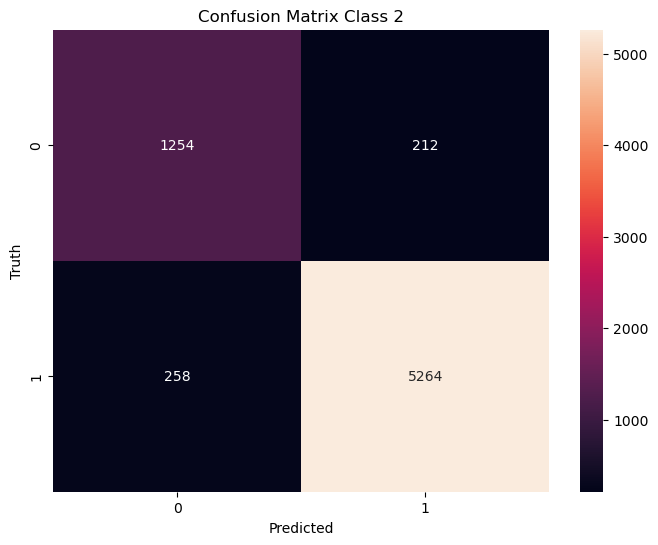

In [48]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class2_labels = np.argmax(test_class2, axis=1)
selected_class2_labels = np.argmax(selected_class2, axis=1)

cm2 = confusion_matrix(y_true=test_class2_labels, y_pred=selected_class2_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm2, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 2')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [49]:
np.sum(cm2)

6988

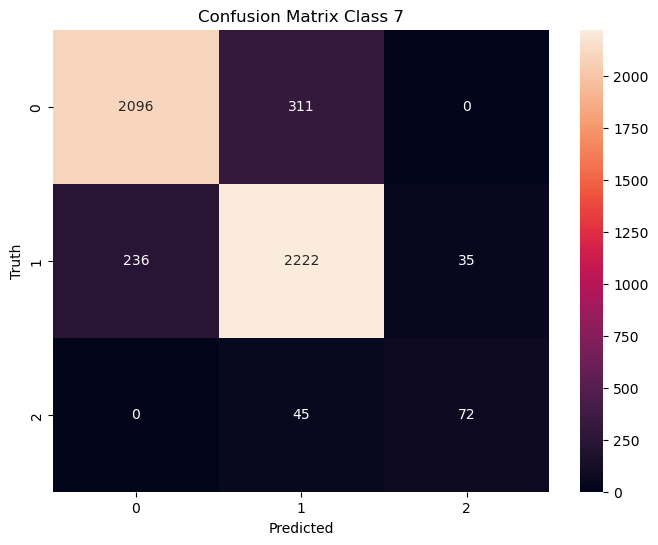

In [50]:
test_class7_labels = np.argmax(test_class7, axis=1)
selected_class7_labels = np.argmax(selected_class7, axis=1)

cm7 = confusion_matrix(y_true=test_class7_labels, y_pred=selected_class7_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm7, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 7')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [51]:
np.sum(cm7)

5017

376/376 [==============================] - 8s 21ms/step


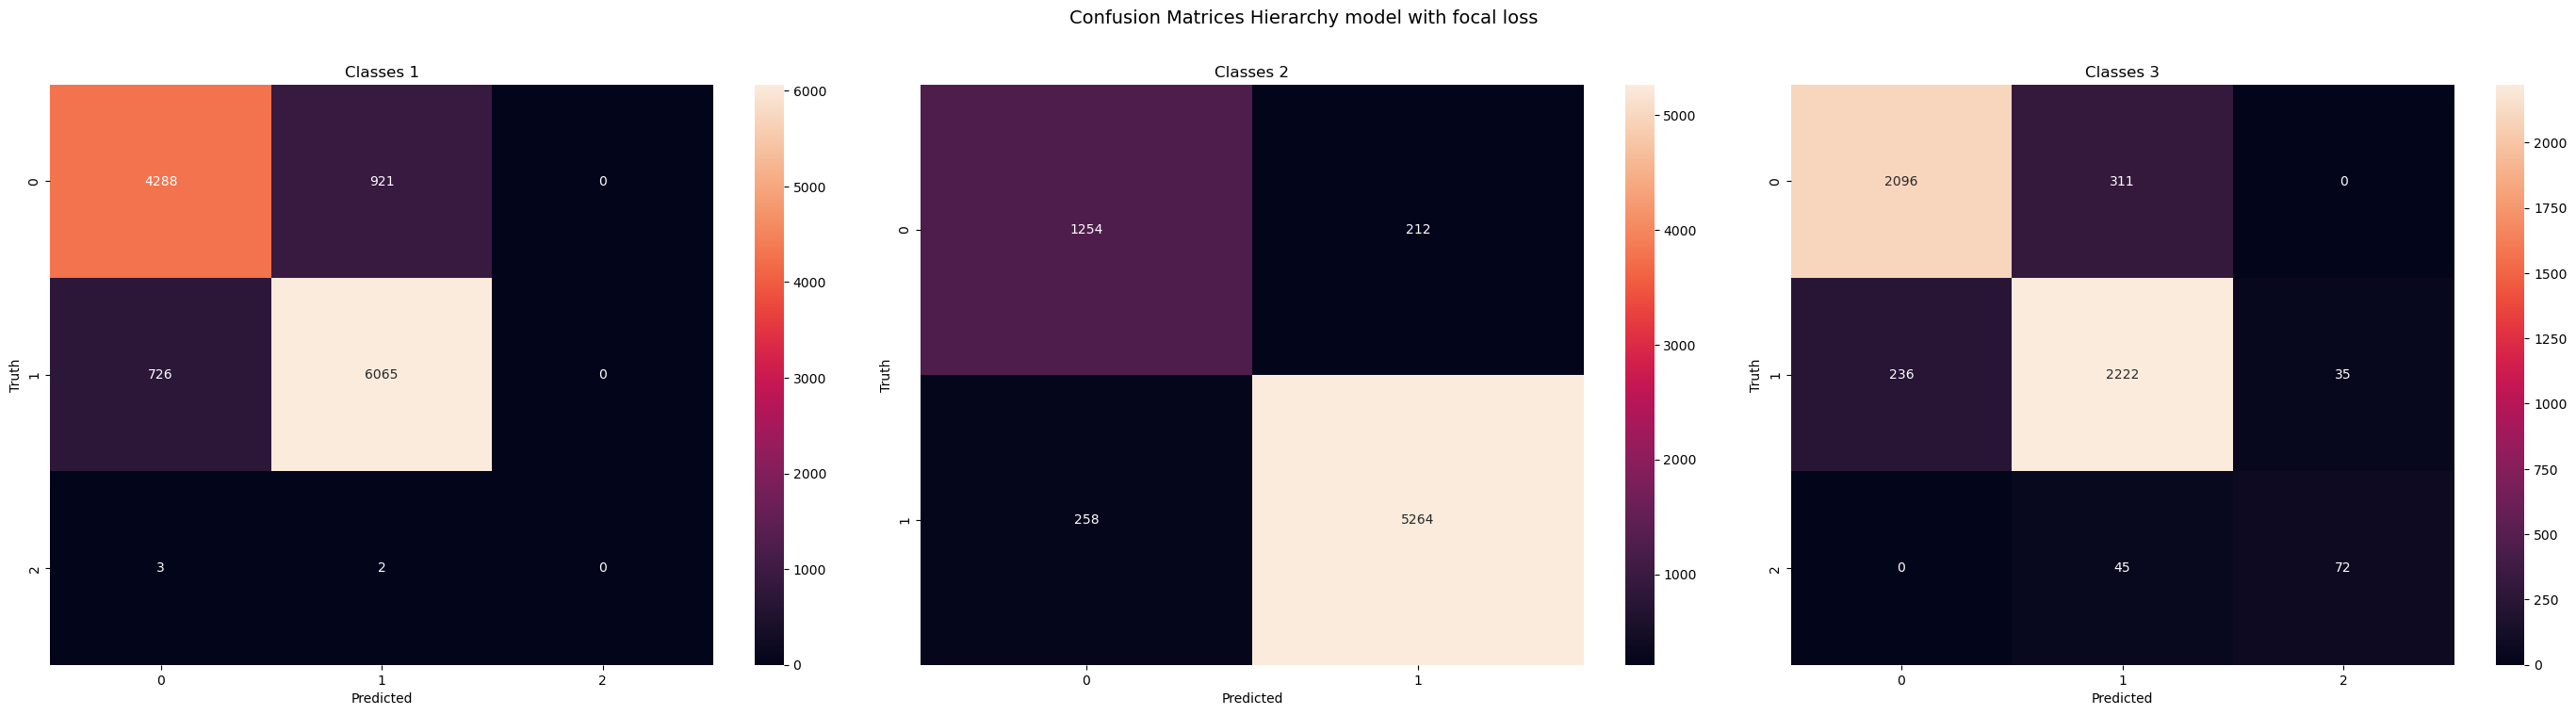

In [59]:
from eval import ConfusionMatrix

y_true = [y_test[0], test_class2, test_class7]
y_predicted = [y_pred[0], selected_class2, selected_class7]

ConfusionMatrix(model=model, data_test=(X_test, y_test), name='Hierarchy model with focal loss')

In [56]:
import pickle

# Load the history from a pickle file
with open('saved_models/History_Hierarchy_ModelII_regression_focalloss', 'rb') as file:
    history = pickle.load(file)
    
history.keys()

dict_keys(['loss', 'Class1_loss', 'Class2_loss', 'Class3_loss', 'Class1_mse', 'Class1_accuracy', 'Class2_mse', 'Class2_accuracy', 'Class3_mse', 'Class3_accuracy', 'val_loss', 'val_Class1_loss', 'val_Class2_loss', 'val_Class3_loss', 'val_Class1_mse', 'val_Class1_accuracy', 'val_Class2_mse', 'val_Class2_accuracy', 'val_Class3_mse', 'val_Class3_accuracy'])

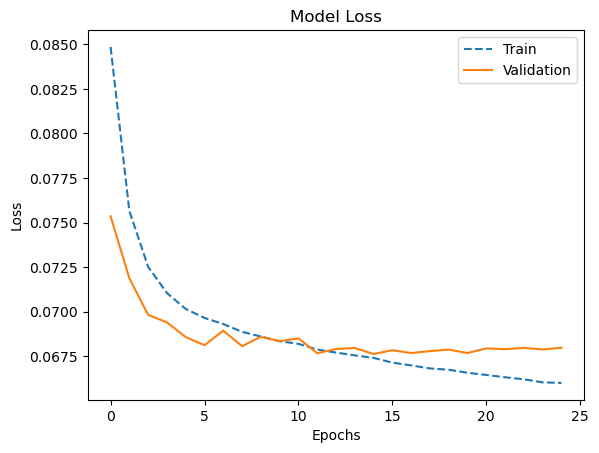

In [57]:
from eval import plot_history

plt.plot(history['loss'], label='Train', linestyle='--')
plt.plot(history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

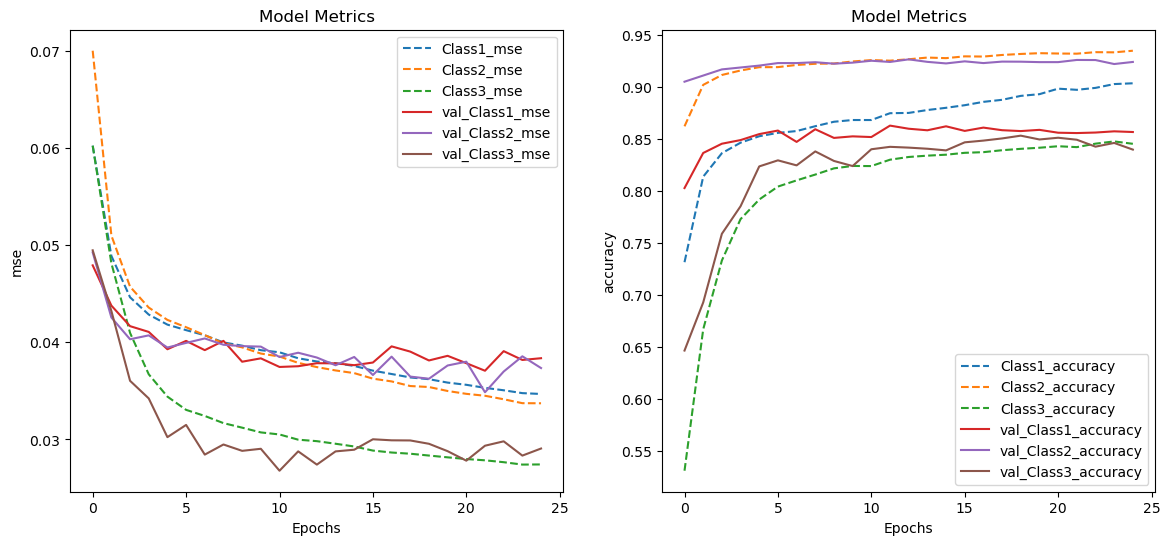

In [58]:
# Plot metrics

metric = ['mse', 'accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    
for key in history.keys():
    if metric[0] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax1.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax1.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax1.set_title('Model Metrics')
ax1.set_xlabel('Epochs')
ax1.set_ylabel(metric[0])
ax1.legend(loc='best')


for key in history.keys():
    if metric[1] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax2.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax2.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax2.set_title('Model Metrics')
ax2.set_xlabel('Epochs')
ax2.set_ylabel(metric[1])
ax2.legend(loc='best')

plt.show()

## Hierarchy model,  FOCAL LOSS + Data AUG

In [11]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 2,
  'min' : 0.5,
  'one_hot_labels' : False,
  'crop' : True,
  'crop_size' : 256 ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.25,
}

X_train, X_val, X_test, y_train_, y_val_, y_test_ = data_loader(images_folder=images_path, 
                                                                     labels_path=labels_path, **data_preprocessing, 
                                                                     random_seed=48)

y_train = [y_train_[:,:3], y_train_[:,3:5], y_train_[:,5:]]
y_val = [y_val_[:,:3], y_val_[:,3:5], y_val_[:,5:]]
y_test= [y_test_[:,:3], y_test_[:,3:5], y_test_[:,5:]]

Loading images: 100%|█████████████████████████████████████████| 60023/60023


In [12]:
from keras.models import load_model
from custom_losses import FocalLoss 

# Load the model and history
model = load_model('saved_models/Hierarchy_ModelII_regression_focalloss_aug.h5', custom_objects={'FocalLoss': FocalLoss})
model.summary()

/Users/danielsb/opt/anaconda3/envs/tflow/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:327: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['activation[0][0]']             
                                                                                              

In [13]:
from eval import evaluate_my_model

evaluate_my_model(model=model, test_data=(X_test, y_test), set_name='testing')

----- EVALUATING MODEL -----
Evaluating the model over the testing set
376/376 [==============================] - 15s 37ms/step - loss: 0.0676 - Class1_loss: 0.0257 - Class2_loss: 0.0235 - Class3_loss: 0.0184 - Class1_mse: 0.0376 - Class1_accuracy: 0.8711 - Class2_mse: 0.0374 - Class2_accuracy: 0.9260 - Class3_mse: 0.0304 - Class3_accuracy: 0.8350

Test loss: 0.06757183372974396
Test Class1_loss: 0.02565782144665718
Test Class2_loss: 0.023486744612455368
Test Class3_loss: 0.018427271395921707
Test Class1_mse: 0.03762137517333031
Test Class1_accuracy: 0.8711370229721069
Test Class2_mse: 0.0373929999768734
Test Class2_accuracy: 0.9260308146476746
Test Class3_mse: 0.030417753383517265
Test Class3_accuracy: 0.8349854350090027


In [14]:
y_pred = model.predict(X_test)

376/376 [==============================] - 11s 28ms/step


In [15]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [33]:
np.sum(y_pred[0], axis=1)

array([1.18422  , 1.0535247, 1.1728643, ..., 1.178775 , 1.219827 ,
       1.1359291], dtype=float32)

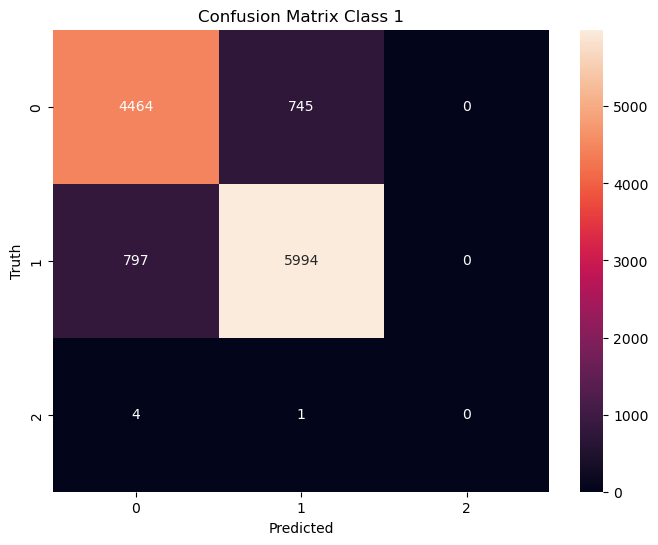

In [17]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class1_labels = np.argmax(y_test[0], axis=1)
pred_class1_labels = np.argmax(y_pred[0], axis=1)

cm = confusion_matrix(y_true=test_class1_labels, y_pred=pred_class1_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [18]:
n_predicted_11 = np.sum(cm[:,0])
n_predicted_12 = np.sum(cm[:,1])

print(n_predicted_11,n_predicted_12)

5265 6740


In [19]:
mask11 = np.argmax(y_pred[0], axis=1) == 0
mask12 = np.argmax(y_pred[0], axis=1) == 1

selected_class2 = y_pred[1][mask12]
selected_class7 = y_pred[2][mask11]

selected_class2.shape, selected_class7.shape

((6740, 2), (5265, 3))

In [20]:
y_test[1].shape, y_test[2].shape

((12005, 2), (12005, 3))

In [21]:
test_class2 = y_test[1][(np.argmax(y_pred[0], axis=1) == 1)]
test_class7 = y_test[2][(np.argmax(y_pred[0], axis=1) == 0)]

test_class2.shape, test_class7.shape

((6740, 2), (5265, 3))

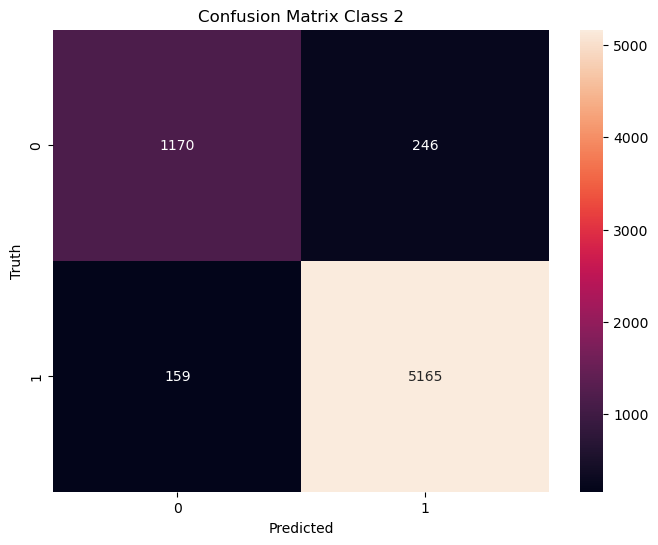

In [22]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class2_labels = np.argmax(test_class2, axis=1)
selected_class2_labels = np.argmax(selected_class2, axis=1)

cm2 = confusion_matrix(y_true=test_class2_labels, y_pred=selected_class2_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm2, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 2')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [23]:
np.sum(cm2)

6740

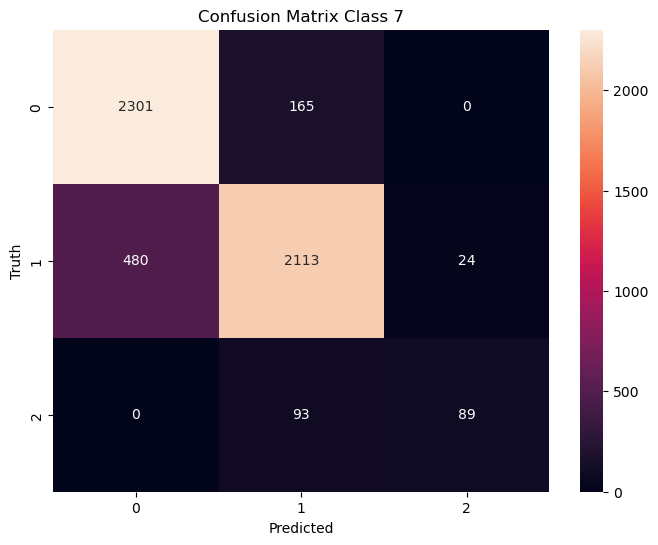

In [24]:
test_class7_labels = np.argmax(test_class7, axis=1)
selected_class7_labels = np.argmax(selected_class7, axis=1)

cm7 = confusion_matrix(y_true=test_class7_labels, y_pred=selected_class7_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm7, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 7')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [25]:
np.sum(cm7)

5265

376/376 [==============================] - 13s 35ms/step


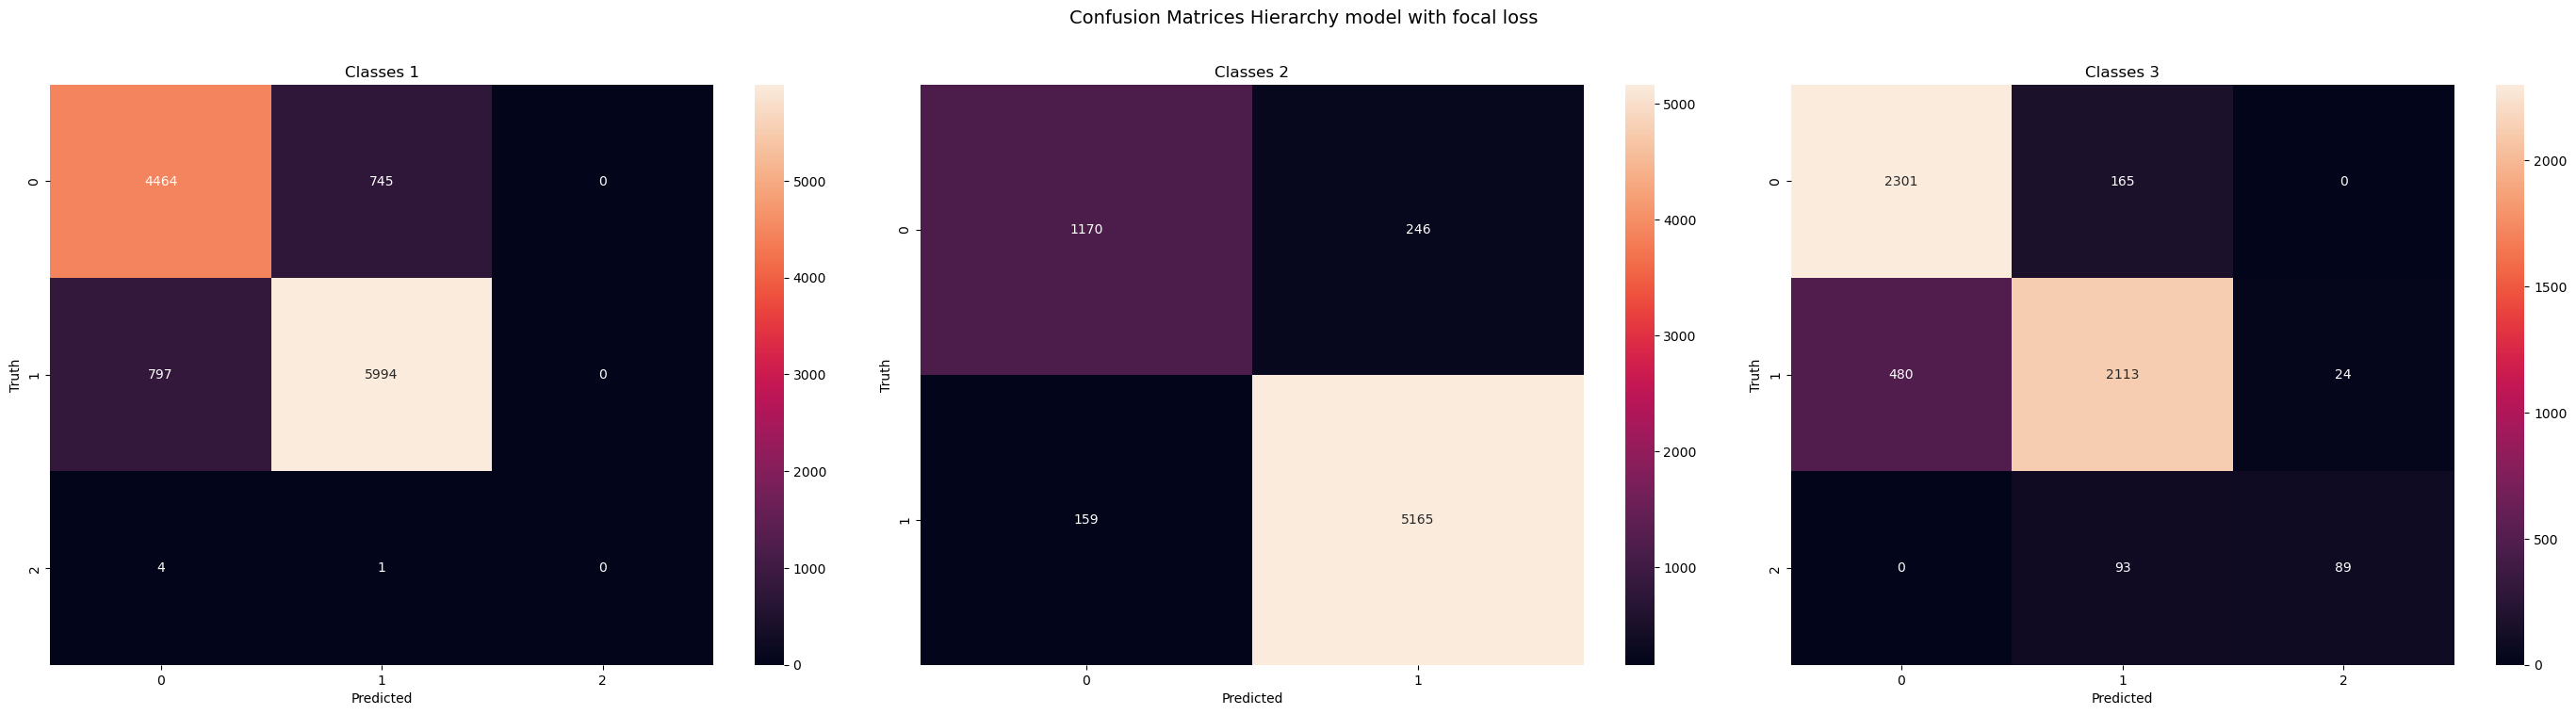

In [32]:
from eval import ConfusionMatrix

y_true = [y_test[0], test_class2, test_class7]
y_predicted = [y_pred[0], selected_class2, selected_class7]

ConfusionMatrix(model=model, data_test=(X_test, y_test), name='Hierarchy model with focal loss', folder_path='metrics_plots/')

In [27]:
import pickle

# Load the history from a pickle file
with open('saved_models/History_Hierarchy_ModelII_regression_focalloss_aug', 'rb') as file:
    history = pickle.load(file)
    
history.keys()

dict_keys(['loss', 'Class1_loss', 'Class2_loss', 'Class3_loss', 'Class1_mse', 'Class1_accuracy', 'Class2_mse', 'Class2_accuracy', 'Class3_mse', 'Class3_accuracy', 'val_loss', 'val_Class1_loss', 'val_Class2_loss', 'val_Class3_loss', 'val_Class1_mse', 'val_Class1_accuracy', 'val_Class2_mse', 'val_Class2_accuracy', 'val_Class3_mse', 'val_Class3_accuracy'])

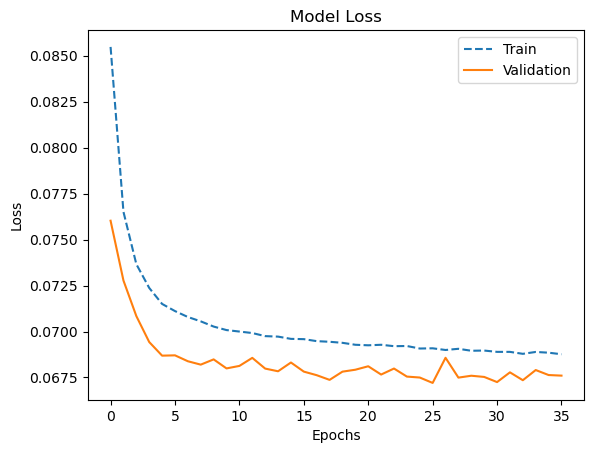

In [28]:
from eval import plot_history

plt.plot(history['loss'], label='Train', linestyle='--')
plt.plot(history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.savefig('Hierarchy_ModelII_', format="pdf")

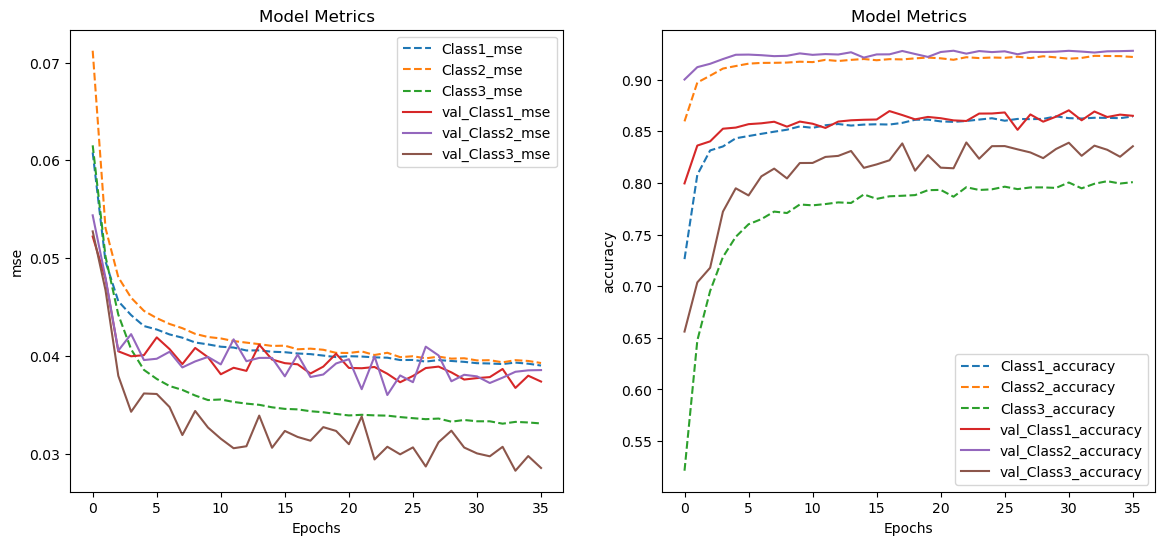

In [29]:
# Plot metrics

metric = ['mse', 'accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    
for key in history.keys():
    if metric[0] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax1.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax1.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax1.set_title('Model Metrics')
ax1.set_xlabel('Epochs')
ax1.set_ylabel(metric[0])
ax1.legend(loc='best')


for key in history.keys():
    if metric[1] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax2.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax2.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax2.set_title('Model Metrics')
ax2.set_xlabel('Epochs')
ax2.set_ylabel(metric[1])
ax2.legend(loc='best')

plt.show()

In [114]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [87]:
np.mean((np.sum(y_pred[0], axis=1)-1)**2)

0.032245386

In [95]:
np.mean((np.sum(y_pred[1], axis=1)-y_pred[0][:,1])**2)

0.042481937

In [107]:
np.mean((np.sum(y_pred[2], axis=1)-y_pred[0][:,0])**2)

0.11807752

In [105]:
np.sum(y_pred[2], axis=1)

array([1.05516   , 0.2628994 , 0.8879137 , ..., 0.74469095, 0.9669754 ,
       0.58147734], dtype=float32)

## Branch model,  MSE LOSS

In [115]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 2,
  'min' : 0.5,
  'one_hot_labels' : False,
  'crop' : True,
  'crop_size' : 256 ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.25,
}

X_train, X_val, X_test, y_train_, y_val_, y_test_ = data_loader(images_folder=images_path, 
                                                                     labels_path=labels_path, **data_preprocessing, 
                                                                     random_seed=48)

y_train = [y_train_[:,:3], y_train_[:,3:5], y_train_[:,5:]]
y_val = [y_val_[:,:3], y_val_[:,3:5], y_val_[:,5:]]
y_test= [y_test_[:,:3], y_test_[:,3:5], y_test_[:,5:]]

Loading images: 100%|█████████████████████████████████████████| 60023/60023


In [116]:
from keras.models import load_model
from keras import models

# Load the model and history
model = load_model('saved_models/Branch_ModelII_regression_aug.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['activation[0][0]']             
                                                                                              

In [117]:
y_pred = model.predict(X_test)

376/376 [==============================] - 19s 50ms/step


In [118]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [120]:
np.sum(y_pred[0], axis=1)

array([0.99999994, 0.9999999 , 0.99999994, ..., 1.        , 1.        ,
       1.        ], dtype=float32)

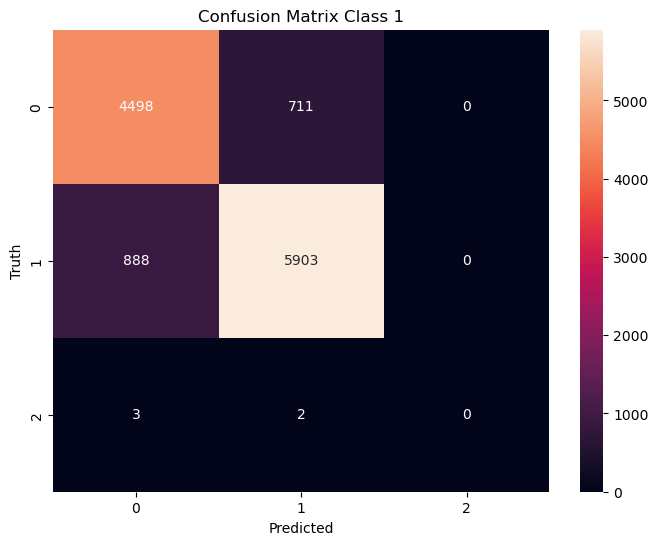

In [121]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class1_labels = np.argmax(y_test[0], axis=1)
pred_class1_labels = np.argmax(y_pred[0], axis=1)

cm = confusion_matrix(y_true=test_class1_labels, y_pred=pred_class1_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [122]:
n_predicted_11 = np.sum(cm[:,0])
n_predicted_12 = np.sum(cm[:,1])

print(n_predicted_11,n_predicted_12)

5389 6616


In [123]:
mask11 = np.argmax(y_pred[0], axis=1) == 0
mask12 = np.argmax(y_pred[0], axis=1) == 1

selected_class2 = y_pred[1][mask12]
selected_class7 = y_pred[2][mask11]

selected_class2.shape, selected_class7.shape

((6616, 2), (5389, 3))

In [125]:
test_class2 = y_test[1][(np.argmax(y_pred[0], axis=1) == 1)]
test_class7 = y_test[2][(np.argmax(y_pred[0], axis=1) == 0)]

test_class2.shape, test_class7.shape

((6616, 2), (5389, 3))

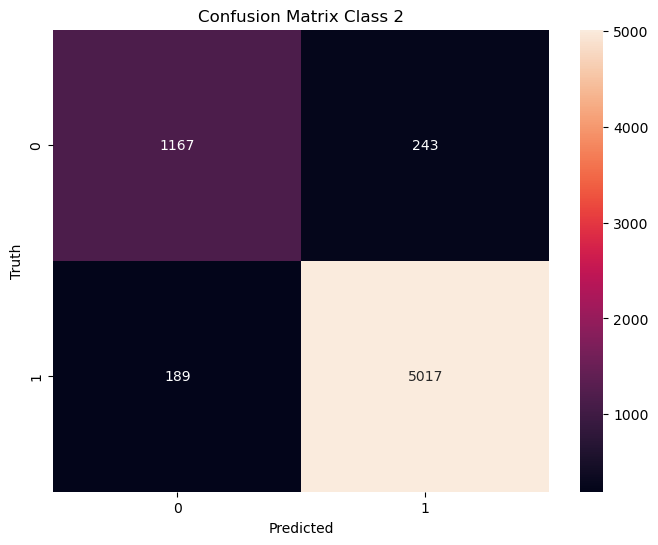

In [126]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class2_labels = np.argmax(test_class2, axis=1)
selected_class2_labels = np.argmax(selected_class2, axis=1)

cm2 = confusion_matrix(y_true=test_class2_labels, y_pred=selected_class2_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm2, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 2')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


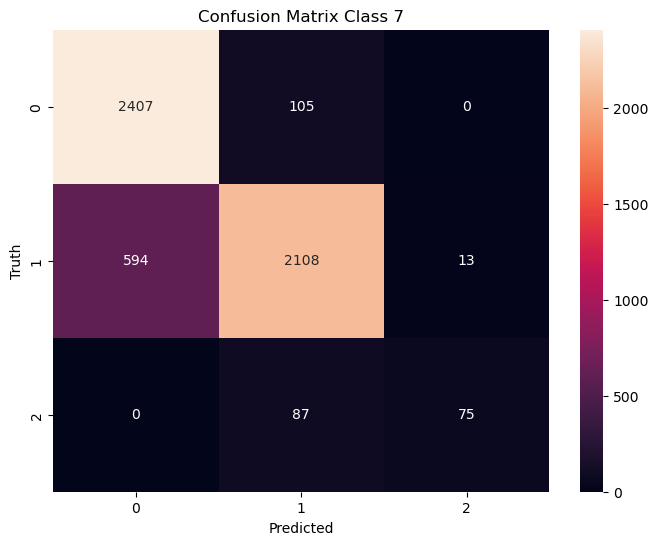

In [128]:
test_class7_labels = np.argmax(test_class7, axis=1)
selected_class7_labels = np.argmax(selected_class7, axis=1)

cm7 = confusion_matrix(y_true=test_class7_labels, y_pred=selected_class7_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm7, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 7')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

376/376 [==============================] - 18s 49ms/step


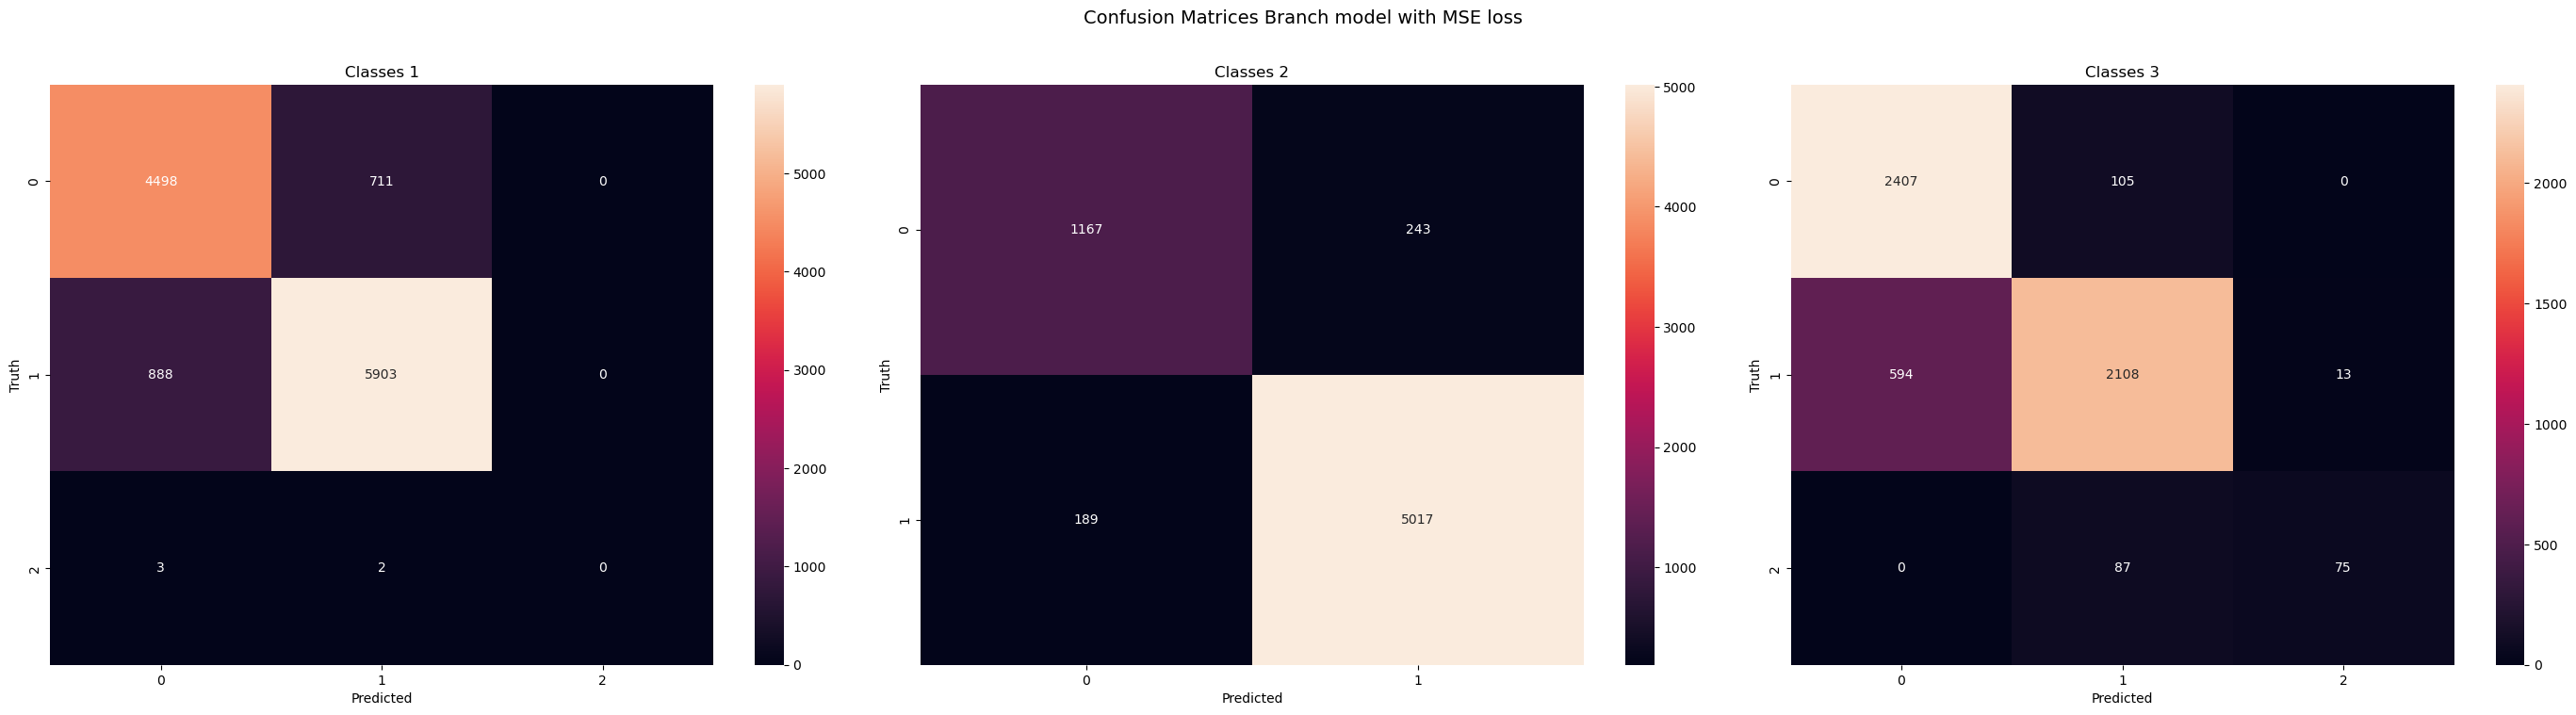

In [130]:
from eval import ConfusionMatrix

y_true = [y_test[0], test_class2, test_class7]
y_predicted = [y_pred[0], selected_class2, selected_class7]

ConfusionMatrix(model=model, data_test=(X_test, y_test), name='Branch model with MSE loss')

In [131]:
import pickle

# Load the history from a pickle file
with open('saved_models/History_Branch_ModelII_regression_aug', 'rb') as file:
    history = pickle.load(file)
    
history.keys()

dict_keys(['loss', 'Class1_loss', 'Class2_loss', 'Class3_loss', 'Class1_mse', 'Class1_accuracy', 'Class2_mse', 'Class2_accuracy', 'Class3_mse', 'Class3_accuracy', 'val_loss', 'val_Class1_loss', 'val_Class2_loss', 'val_Class3_loss', 'val_Class1_mse', 'val_Class1_accuracy', 'val_Class2_mse', 'val_Class2_accuracy', 'val_Class3_mse', 'val_Class3_accuracy'])

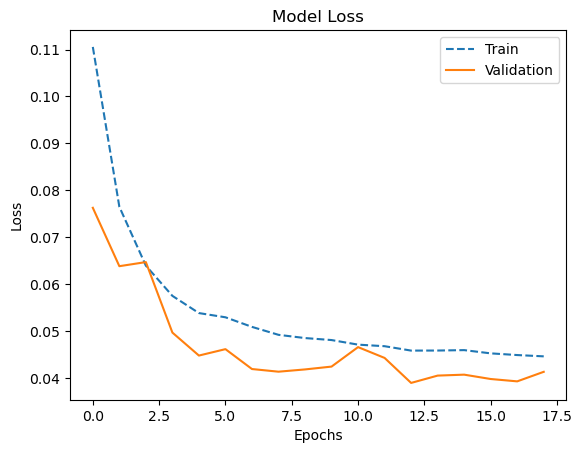

In [133]:
from eval import plot_history

plt.plot(history['loss'], label='Train', linestyle='--')
plt.plot(history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

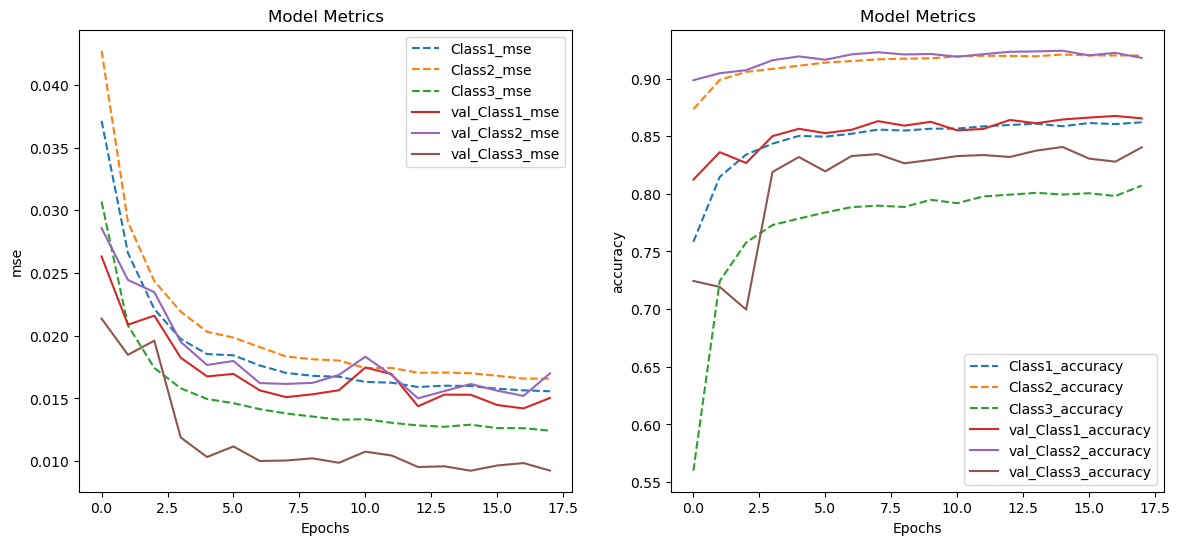

In [134]:
# Plot metrics

metric = ['mse', 'accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    
for key in history.keys():
    if metric[0] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax1.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax1.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax1.set_title('Model Metrics')
ax1.set_xlabel('Epochs')
ax1.set_ylabel(metric[0])
ax1.legend(loc='best')


for key in history.keys():
    if metric[1] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax2.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax2.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax2.set_title('Model Metrics')
ax2.set_xlabel('Epochs')
ax2.set_ylabel(metric[1])
ax2.legend(loc='best')

plt.show()

In [140]:
np.max(y_pred[0], axis=1)

array([0.7918474 , 0.97593087, 0.5630161 , ..., 0.7360827 , 0.72264147,
       0.8385201 ], dtype=float32)

In [138]:
np.sum(y_pred[1], axis=1)

array([0.17092466, 0.9761581 , 0.3762523 , ..., 0.73484993, 0.2293174 ,
       0.8385045 ], dtype=float32)

In [139]:
np.sum(y_pred[2], axis=1)

array([0.7822345 , 0.0238216 , 0.5724189 , ..., 0.26580775, 0.7193024 ,
       0.1592566 ], dtype=float32)

## Branch model,  FOCAL LOSS + Data AUG

In [34]:
# Load data as in the experiment

from utils import data_loader

data_preprocessing = {
  'task' : 2,
  'min' : 0.5,
  'one_hot_labels' : False,
  'crop' : True,
  'crop_size' : 256 ,
  'img_size' : (64, 64),
  'normalize' : True,
  'grayscale' : False,
  'training_size' : 0.80, 
  'test_size' : 0.25,
}

X_train, X_val, X_test, y_train_, y_val_, y_test_ = data_loader(images_folder=images_path, 
                                                                     labels_path=labels_path, **data_preprocessing, 
                                                                     random_seed=48)

y_train = [y_train_[:,:3], y_train_[:,3:5], y_train_[:,5:]]
y_val = [y_val_[:,:3], y_val_[:,3:5], y_val_[:,5:]]
y_test= [y_test_[:,:3], y_test_[:,3:5], y_test_[:,5:]]

Loading images: 100%|█████████████████████████████████████████| 60023/60023


In [35]:
from keras.models import load_model
from custom_losses import FocalLoss 

# Load the model and history
model = load_model('saved_models/Branch_ModelII_focalloss_aug.h5', custom_objects={'FocalLoss': FocalLoss})
model.summary()

/Users/danielsb/opt/anaconda3/envs/tflow/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:327: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['activation[0][0]']             
                                                                                              

In [36]:
y_pred = model.predict(X_test)

376/376 [==============================] - 21s 55ms/step


In [37]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [38]:
np.sum(y_pred[0], axis=1)

array([1.       , 0.9999999, 1.       , ..., 0.9999999, 1.       ,
       1.       ], dtype=float32)

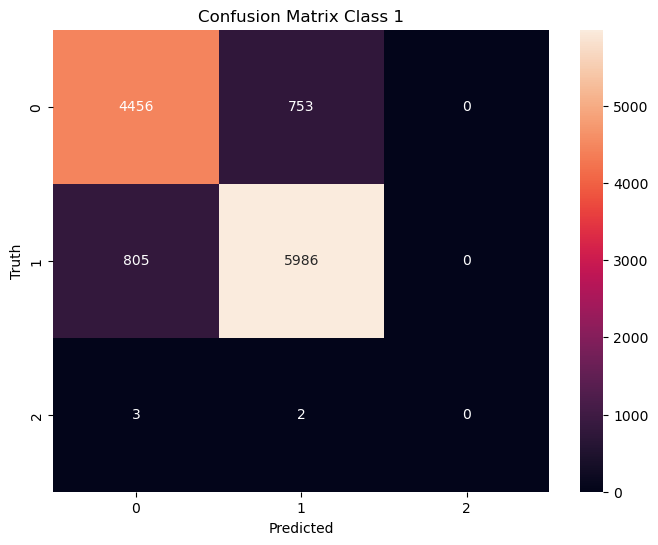

In [39]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class1_labels = np.argmax(y_test[0], axis=1)
pred_class1_labels = np.argmax(y_pred[0], axis=1)

cm = confusion_matrix(y_true=test_class1_labels, y_pred=pred_class1_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [40]:
n_predicted_11 = np.sum(cm[:,0])
n_predicted_12 = np.sum(cm[:,1])

print(n_predicted_11,n_predicted_12)

5264 6741


In [41]:
mask11 = np.argmax(y_pred[0], axis=1) == 0
mask12 = np.argmax(y_pred[0], axis=1) == 1

selected_class2 = y_pred[1][mask12]
selected_class7 = y_pred[2][mask11]

selected_class2.shape, selected_class7.shape

((6741, 2), (5264, 3))

In [42]:
y_test[1].shape, y_test[2].shape

((12005, 2), (12005, 3))

In [43]:
test_class2 = y_test[1][(np.argmax(y_pred[0], axis=1) == 1)]
test_class7 = y_test[2][(np.argmax(y_pred[0], axis=1) == 0)]

test_class2.shape, test_class7.shape

((6741, 2), (5264, 3))

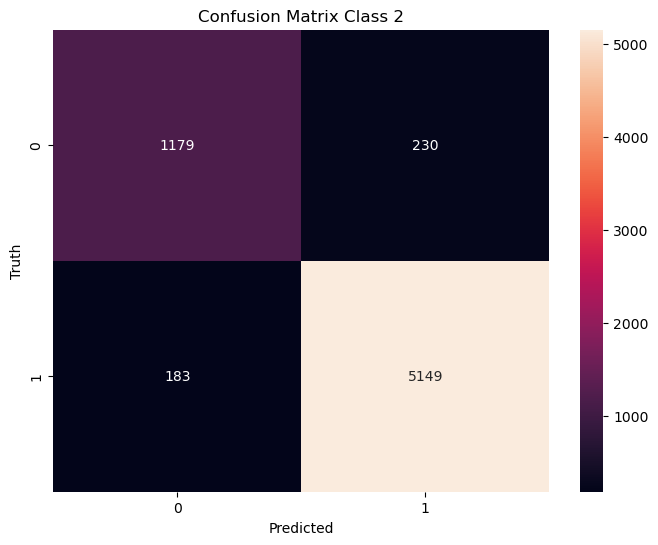

In [44]:
from eval import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_class2_labels = np.argmax(test_class2, axis=1)
selected_class2_labels = np.argmax(selected_class2, axis=1)

cm2 = confusion_matrix(y_true=test_class2_labels, y_pred=selected_class2_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm2, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 2')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


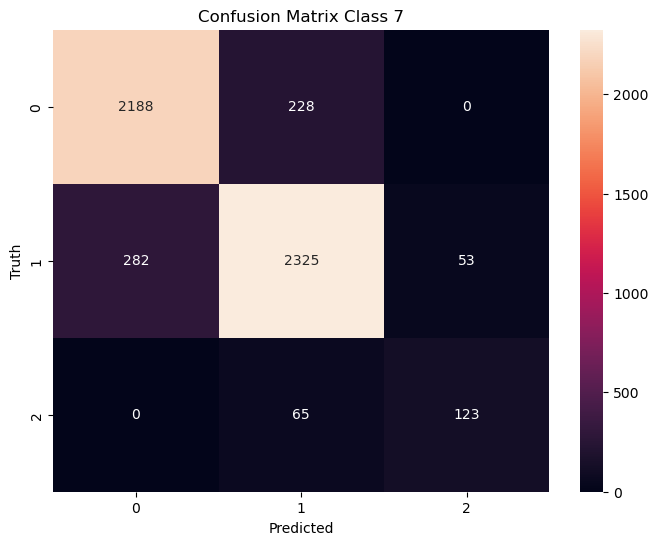

In [45]:
test_class7_labels = np.argmax(test_class7, axis=1)
selected_class7_labels = np.argmax(selected_class7, axis=1)

cm7 = confusion_matrix(y_true=test_class7_labels, y_pred=selected_class7_labels)

fig_width = 8
fig_height = 6
        
    #aspect_ratio = fig_width / fig_height        
        
plt.figure(figsize=(fig_width, fig_height))
    #plt.gca().set_aspect(aspect_ratio)
    
sns.heatmap(cm7, annot=True, fmt='d')
plt.title(f'Confusion Matrix Class 7')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

376/376 [==============================] - 20s 53ms/step


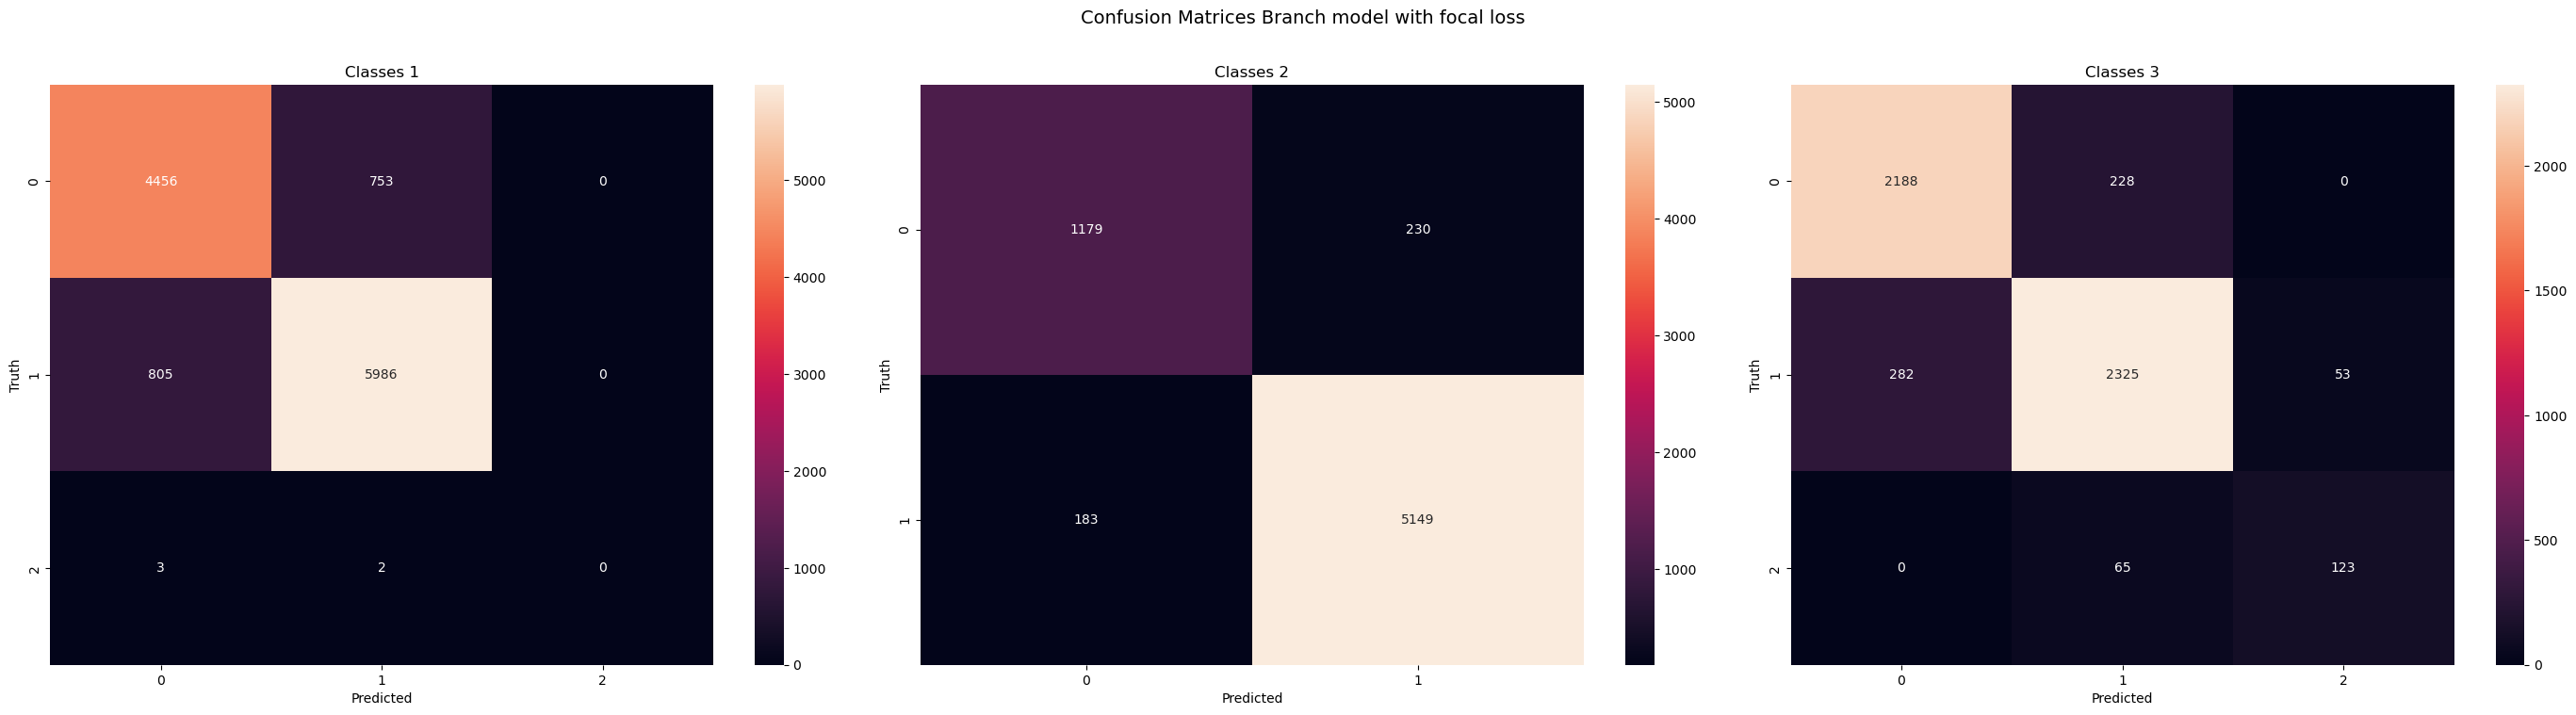

In [59]:
from eval import ConfusionMatrix

y_true = [y_test[0], test_class2, test_class7]
y_predicted = [y_pred[0], selected_class2, selected_class7]

ConfusionMatrix(model=model, data_test=(X_test, y_test), name='Branch model with focal loss', folder_path='metrics_plots/')

In [47]:
import pickle

# Load the history from a pickle file
with open('saved_models/History_Branch_ModelII_focalloss_aug', 'rb') as file:
    history = pickle.load(file)
    
history.keys()

dict_keys(['loss', 'Class1_loss', 'Class2_loss', 'Class3_loss', 'Class1_mse', 'Class1_accuracy', 'Class2_mse', 'Class2_accuracy', 'Class3_mse', 'Class3_accuracy', 'val_loss', 'val_Class1_loss', 'val_Class2_loss', 'val_Class3_loss', 'val_Class1_mse', 'val_Class1_accuracy', 'val_Class2_mse', 'val_Class2_accuracy', 'val_Class3_mse', 'val_Class3_accuracy'])

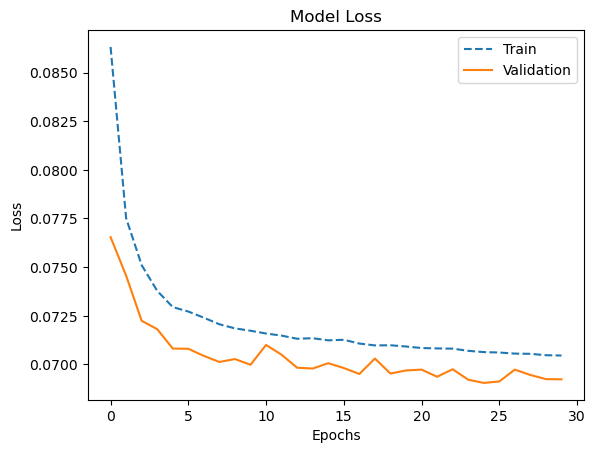

In [48]:
from eval import plot_history

plt.plot(history['loss'], label='Train', linestyle='--')
plt.plot(history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

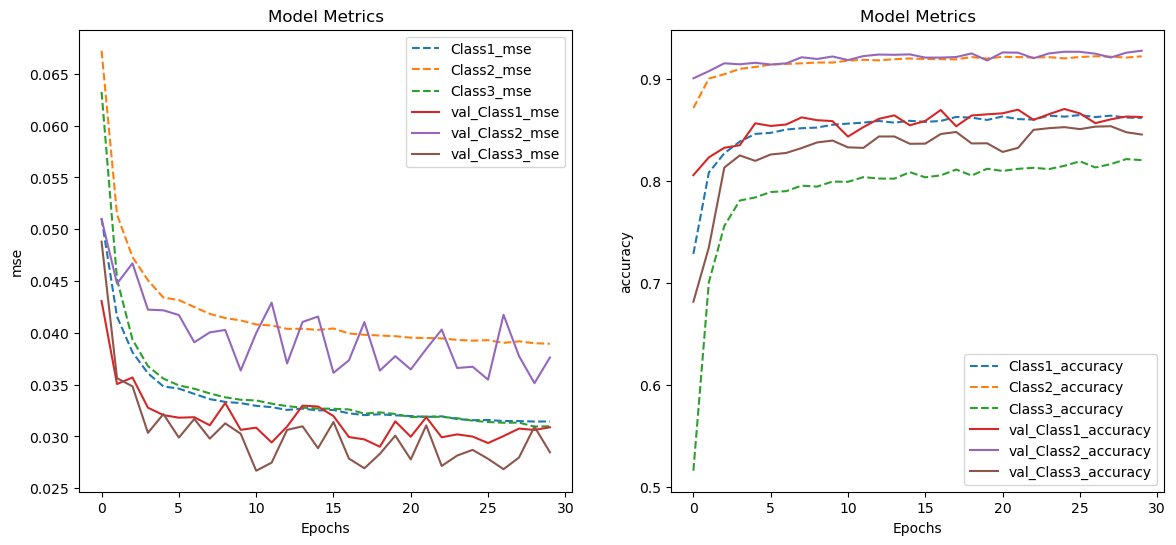

In [49]:
# Plot metrics

metric = ['mse', 'accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    
for key in history.keys():
    if metric[0] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax1.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax1.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax1.set_title('Model Metrics')
ax1.set_xlabel('Epochs')
ax1.set_ylabel(metric[0])
ax1.legend(loc='best')


for key in history.keys():
    if metric[1] in key and 'loss' not in key:  # Ignore keys that contain 'loss'
        if 'val_' in key:  # If 'val_' is in the key, this is a validation metric
            ax2.plot(history[key], label=key, linestyle='-')  # Plot with a solid line
        else:  # Otherwise, this is a training metric
            ax2.plot(history[key], label=key, linestyle='--')  # Plot with a dashed line

ax2.set_title('Model Metrics')
ax2.set_xlabel('Epochs')
ax2.set_ylabel(metric[1])
ax2.legend(loc='best')

plt.show()

In [50]:
y_pred[0].shape, y_pred[1].shape, y_pred[2].shape

((12005, 3), (12005, 2), (12005, 3))

In [51]:
np.mean((np.sum(y_pred[0], axis=1)-1)**2)

2.75339e-15

In [52]:
np.mean((np.sum(y_pred[1], axis=1)-y_pred[0][:,1])**2)

0.04755581

In [53]:
np.mean((np.sum(y_pred[2], axis=1)-y_pred[0][:,0])**2)

0.14245668

In [54]:
np.sum(y_pred[2], axis=1)

array([1.0122561 , 0.27988788, 0.9439698 , ..., 0.6690575 , 0.99032825,
       0.58978283], dtype=float32)

In [55]:
y_pred[0][np.argmax(y_pred[0], axis=1) == 0]

array([[0.5407502 , 0.34445307, 0.11479679],
       [0.51553094, 0.3759457 , 0.10852329],
       [0.5560695 , 0.27324545, 0.17068505],
       ...,
       [0.4877617 , 0.4240725 , 0.0881658 ],
       [0.512425  , 0.3698995 , 0.11767547],
       [0.50995755, 0.3730519 , 0.1169906 ]], dtype=float32)

In [56]:
y_pred[0]

array([[0.5407502 , 0.34445307, 0.11479679],
       [0.1477248 , 0.7902292 , 0.06204588],
       [0.46011183, 0.46291772, 0.07697044],
       ...,
       [0.32982275, 0.60627204, 0.06390514],
       [0.50995755, 0.3730519 , 0.1169906 ],
       [0.32061827, 0.6237739 , 0.05560789]], dtype=float32)

In [57]:
y_pred[1]

array([[0.19018051, 0.34435067],
       [0.22533517, 0.7902292 ],
       [0.29582107, 0.4592992 ],
       ...,
       [0.22730915, 0.6062685 ],
       [0.17840363, 0.37297893],
       [0.17202239, 0.6237739 ]], dtype=float32)

In [58]:
y_pred[2]

array([[0.21884929, 0.54067844, 0.25272837],
       [0.08507358, 0.14763975, 0.04717456],
       [0.13466021, 0.43908438, 0.3702252 ],
       ...,
       [0.25200978, 0.32303384, 0.09401389],
       [0.4241147 , 0.4551613 , 0.1110522 ],
       [0.316395  , 0.237619  , 0.03576882]], dtype=float32)